In [1]:
import numpy as np

from scipy.optimize import minimize
from scipy import optimize
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt


figure_options = {'figsize':[20,10]}

seed = np.random.RandomState(0)
alpha = seed.random()
beta = seed.random()


In [10]:
def linear(x, a, b):
    return a * x + b

def rational(x, a, b):
    return a / (1 + b * x)

def squared_diff(coeffs, x, y, func):
    a, b = coeffs
    return np.sum((func(x, a, b) - y)**2)

def absolute_error(coeffs, x, y, func):
    a, b = coeffs
    return func(x, a, b) - y



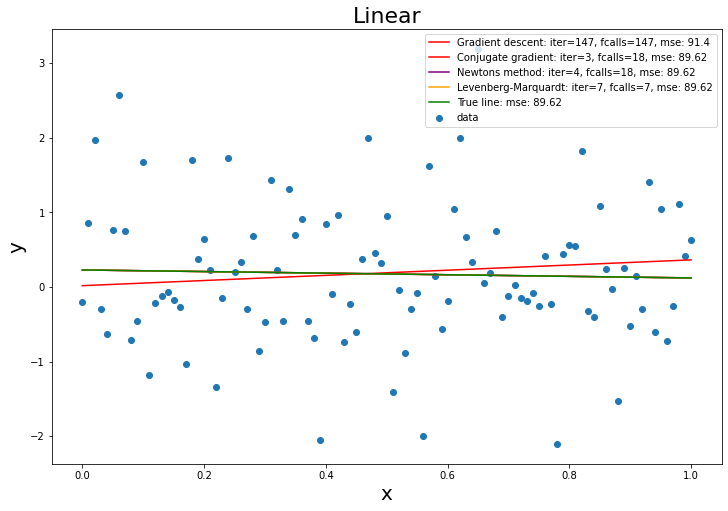

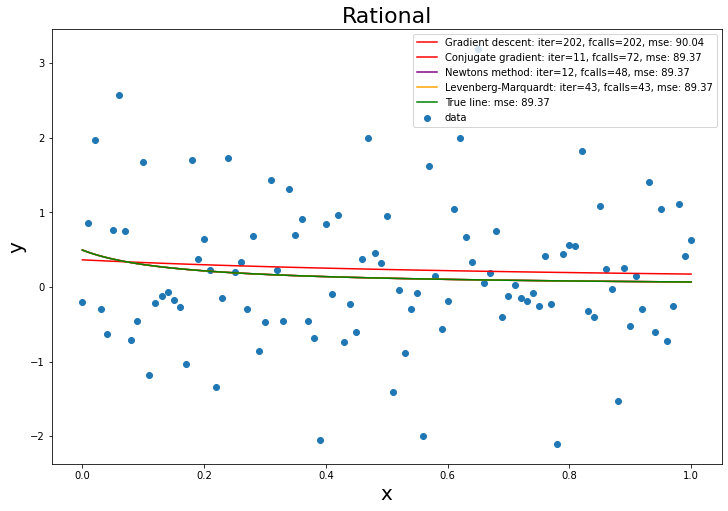

In [13]:
import copy
from scipy.linalg import norm


def gradient_descent(x, y, func, eps):
    a, b = 1.0 , 1.0
    learning_rate = 0.01
    iters = 0
    fcalls = 0
    while True:
        prev_a, prev_b = a, b
        if func == 'Linear':
            a = a - learning_rate * (-2) / len(x) * sum(x * (y - a * x - b))
            b = b - learning_rate * (-2) / len(x) * sum(y - a * x - b)
        elif func == 'Rational':
            a = a - learning_rate * (-2/len(x)) * sum((-a + b * x * y + y) / (b*x + 1)**2)
            b = b - learning_rate * (-2)/len(x) * sum(a * x * (a - y * (b*x + 1)) / (b * x + 1) ** 3)
        iters += 1
        fcalls += 1
        if ((a - prev_a) ** 2 + (b - prev_b) ** 2) ** 0.5 < eps:
            break

    return iters, fcalls, (a, b)


x = np.arange(0, 101) / 100

y = alpha * x + beta + seed.normal(0, 1, 101)

start = np.array([1.0, 1.0])

for f, label in zip(
    [linear, rational], 
    ['Linear', 'Rational']
):
    
    grad_nit, grad_call, grad_param = gradient_descent(x,y, label, 0.001)
    

    newton = minimize(
        squared_diff, 
        x0=start, 
        args=(x, y, f), 
        method='BFGS', 
        tol=1e-3
    )

    conjugate = minimize(
        squared_diff, 
        x0=start, 
        args=(x, y, f), 
        method='CG', 
        tol=1e-3
    )

    lm = optimize.least_squares(
        absolute_error, 
        x0=start, 
        args=(x, y, f), 
        method='lm'
    )

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.plot(x, 
            f(x, *grad_param), 
            color='red', 
            label=f'Gradient descent: iter={grad_nit}, fcalls={grad_call}, mse: {squared_diff(grad_param, x, y, f):.4}')
    ax.plot(x, 
            f(x, *conjugate.x), 
            color='red', 
            label=f'Conjugate gradient: iter={conjugate.nit}, fcalls={conjugate.nfev}, mse: {conjugate.fun:.4}')
    ax.plot(x, 
            f(x, *newton.x), 
            color='purple', 
            label=f'Newtons method: iter={newton.nit}, fcalls={newton.nfev}, mse: {newton.fun:.4}')
    ax.plot(x, 
            f(x, *lm.x), 
            color='orange', 
            label=f'Levenberg-Marquardt: iter={lm.nfev}, fcalls={lm.nfev}, mse: {squared_diff(lm.x, x, y, f):.4}')
    true_line = curve_fit(f, x, y)[0]
    ax.plot(x,
            f(x, *true_line), 
            color='green', 
            label=f'True line: mse: {squared_diff(true_line, x, y, f):.4}')

    ax.scatter(x, y, label='data')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('y', fontsize=20)
    ax.set_title(label, fontsize=22)
    ax.legend()
    plt.show()